In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = np.genfromtxt('./Dados/artificial1d.csv', delimiter=',')

In [3]:
X = np.c_ [ np.ones(dataset.shape[0]), dataset[:,[0]] ]
y = dataset[:,[1]]

#Questão1

In [4]:
def MRE(y_true ,y_pred):
 mre = np.mean(np.abs((y - pred)/y))
 return mre

In [5]:
def RMSE(y_true ,y_pred):
 rmse = np.sqrt(np.mean((y - pred) ** 2))
 return rmse

In [6]:
def MSE(true, pred):
 mse = np.mean((true - pred)**2)
 return mse

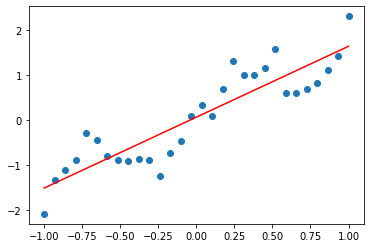

In [7]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
#w = np.linalg.solve(X.T @ X, X.T @ y)

pred = X @ w
rmse = RMSE(y, pred)
mre = MRE(y, pred)

X_test = np.c_ [ np.ones(100), np.linspace(X[:,1].min(), X[:,1].max(), 100)]

plt.scatter(X[:,1], y)
plt.plot(X_test[:,1], X_test @ w, color="red")

Vetor de parâmetros:
[[-5.36607795e-17]
 [ 8.97493907e-01]]
RMSE obtido nos dados originais: 0.4482079942412715
MRE obtido nos dados originais: 0.7682299437831888


Text(0.5, 1.0, 'Treinamento via GD')

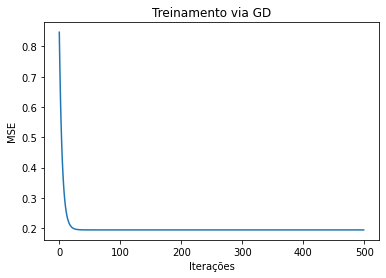

In [8]:
data_scaled = dataset[:,[0]]
data_mean = data_scaled.mean(axis=0)
data_std = data_scaled.std(axis=0)
data_scaled = (data_scaled - data_mean) / data_std
X = np.c_[ np.ones(dataset.shape[0]), data_scaled ]

y_original = dataset[:,[1]]
y_mean = y_original.mean()
y_std = y_original.std()
y = (y_original - y_mean) / y_std

N= X.shape[0]
alpha = 0.1
num_epochs = 500
w = np.zeros((X.shape[1],1))

mse_history = []
for epoch in range(num_epochs):
    error = y - X @ w

    w += alpha * X.T @ error / N

    mse_history.append(np.mean((y - X @ w)**2))

pred = X @ w
pred = pred * y_std + y_mean
rmse = RMSE(y, pred)
mre = MRE(y, pred)
print("Vetor de parâmetros:")
print(w)
print("RMSE obtido nos dados originais:", rmse)
print("MRE obtido nos dados originais:", mre)
plt.plot(mse_history);
plt.xlabel("Iterações");
plt.ylabel("MSE")
plt.title("Treinamento via GD")

Vetor de parâmetros:
[[-1.26533409e+00]
 [-9.35402467e-06]]
RMSE obtido nos dados originais 1.6068499587423148
MRE obtido nos dados originais: 4.53893888662498


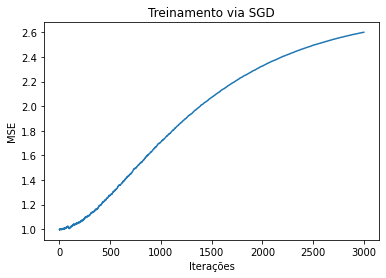

In [9]:
data_scaled = dataset[:,[0]]
data_mean = data_scaled.mean(axis=0)
data_std = data_scaled.std(axis=0)
data_scaled = (data_scaled - data_mean) / data_std
X = np.c_[ np.ones(dataset.shape[0]), data_scaled]

y_original = dataset[:,[1]]
y_mean = y_original.mean()
y_std = y_original.std()
y = (y_original - y_mean) / y_std

N = X.shape[0]
alpha = 0.001
num_epochs = 100
w = np.zeros((X.shape[1],1))

mse_history = []
for epoch in range(num_epochs):
    for i in np.random.permutation(y.shape[0]):
        xi = X[[i]].T
        error = y[1] - w.T @ xi
        w += alpha * error * xi
        mse_history.append(np.mean((y - X @ w)**2))
pred = X @ w
pred = pred * y_std + y_mean
rmse = RMSE(y, pred)
mre = MRE(y, pred)
print("Vetor de parâmetros:")
print(w)
print("RMSE obtido nos dados originais", rmse)
print("MRE obtido nos dados originais:", mre)
plt.plot(mse_history)
plt.xlabel("Iterações");
plt.ylabel("MSE");
plt.title("Treinamento via SGD");

#Questão 2

In [10]:
class RegressaoGD():
 def __init__(self, t=1000, z = 0.01):
  self.w = None
  self.t = t
  self.z = z
  self.w_hist = []
  self.custos = []

 def fit(self, X, y):
  X = np.c_[np.ones(X.shape[0]), X]
  self.w = np.random.rand(X.shape[1])

  for epoch in range(self.t):
   pred = X @ self.w
   erro = y - pred
   custo = (1/(2*len(y))) * np.sum((y - pred)**2)
   self.w = self.w + (self.z * (1/len(y)) * (X.T @ erro))
   # Armazenando o histórico
   self.custos.append(custo)
   self.w_hist.append(self.w)

 def predict(self, X):
  X = np.c_[np.ones(X.shape[0]), X]
  return X @ self.w

In [11]:
class RegrePol():
 def __init__(self, t=1000, z = 0.01, lamb = 0, ordem = 1):
  self.w = None
  self.t = t
  self.z = z
  self.w_hist = []
  self.custos = []
  self.lamb = lamb
  self.ordem = ordem

 def fit(self, X, y):

  if self.ordem == 1:
   X = np.c_[np.ones(X.shape[0]), X]

  if self.ordem > 1:
   for coluna in range(X.shape[1]):
    for i in range(2,self.ordem+1):
     X = np.c_[X, X[:, coluna]**i]

    X = np.c_[np.ones(X.shape[0]), X]

  self.w = np.random.rand(X.shape[1])

  for epoch in range(self.t):
   #X = 30,2 , w = (2,) X @ w = (30,)
   pred = X @ self.w
   erro = y - pred

   custo = (1/(2*len(y))) * np.sum((y - pred)**2)
   termo = self.lamb*self.w
   termo[0] = 0

   self.w = self.w + (self.z * ((1/len(y)) * (X.T @ erro) - termo))
   # Armazenando o histórico
   self.custos.append(custo)
   self.w_hist.append(self.w)

 def predict(self, X):

  if self.ordem == 1:
   X = np.c_[np.ones(X.shape[0]), X]

  if self.ordem > 1:
   for coluna in range(X.shape[1]):
    for i in range(2,self.ordem+1):
     X = np.c_[X, X[:, coluna]**i]

    X = np.c_[np.ones(X.shape[0]), X]

  return X @ self.w

In [12]:
def treino_teste(X, y, tamanho_teste = 0.2):
 randomi = np.random.permutation(len(y))
 limiar = int(len(y) * tamanho_teste)
 X_teste = X[randomi][0:limiar]
 X_treino = X[randomi][limiar:]
 y_teste = y[randomi][0:limiar]
 y_treino = y[randomi][limiar:]
 return X_treino, X_teste, y_treino, y_teste

In [13]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [14]:
X_treino, X_teste, y_treino, y_teste = treino_teste(X, y, tamanho_teste = 0.2)

In [15]:
class escala_min_max():
 def __init__(self):
  self.max = None
  self.min = None
 def fit(self, dados):
  self.max = dados.max()
  self.min = dados.min()
 def transform(self, dados):
  return (dados - self.min)/ (self.max-self.min)
 def inversa(self, dados):
  return dados * (self.max - self.min) + self.min

In [16]:
#Escalonamento dos dados entre 0 e 1
alter_X_01 = escala_min_max()
alter_y_01 = escala_min_max()

alter_X_01.fit(X_treino)
alter_y_01.fit(y_treino)

X_treino_01 = alter_X_01.transform(X_treino)
X_teste_01 = alter_X_01.transform(X_teste)
y_treino_01 =  alter_y_01.transform(y_treino)
y_teste_01 =  alter_y_01.transform(y_teste)

In [17]:
#Teste dos modelos
gd = RegressaoGD()
gd.fit(X_treino_01,y_treino_01)
y_chapeu = gd.predict(X_teste_01)
y_chapeu = alter_y_01.inversa(y_chapeu)
print(np.sqrt(MSE(y_chapeu,y_teste)))

from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_chapeu,y_teste)))

10.793835083893702
10.793835083893702


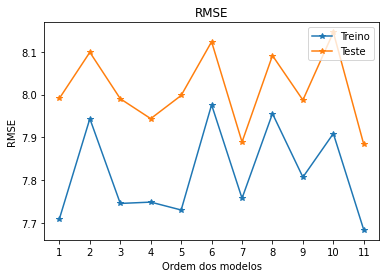

In [18]:
#Histórico dos erros
rmse_treino = []
mre_treino = []
rmse_teste = []
mre_teste = []

for i in range(1,12):
    polinomial = RegrePol(t = 5000 ,z = 0.1 ,ordem = i)
    polinomial.fit(X_treino_01, y_treino_01)

    y_pred_teste_01 = polinomial.predict(X_teste_01)
    y_pred_treino_01 = polinomial.predict(X_treino_01)

    y_pred_teste = alter_y_01.inversa(y_pred_teste_01)
    y_pred_treino = alter_y_01.inversa(y_pred_treino_01)
    
    rmse_treino.append(np.sqrt(MSE(y_pred_treino, y_treino)))
    mre_treino.append(MRE(y_pred_treino, y_treino))
    
    rmse_teste.append(np.sqrt(MSE(y_pred_teste, y_teste)))
    mre_teste.append(MRE(y_pred_teste, y_teste))  

plt.plot(rmse_treino,label='Treino', marker = '*')
plt.plot(rmse_teste,label='Teste', marker = '*')
plt.xlabel('Ordem dos modelos')
plt.ylabel('RMSE')
ticks = np.arange(0,11)
labels = np.arange(1,12)
plt.xticks(ticks,labels)
plt.title("RMSE")
plt.legend()
plt.show()

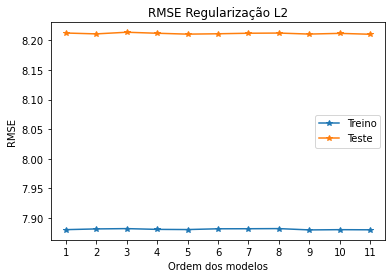

In [19]:
rmse_treino = []
mre_treino = []
rmse_teste = []
mre_teste = []

for i in range(1,12):
    polinomial = RegrePol(t = 5000, z = 0.1, lamb=0.01 ,ordem = i)
    polinomial.fit(X_treino_01, y_treino_01)

    y_pred_teste_01 = polinomial.predict(X_teste_01)
    y_pred_treino_01 = polinomial.predict(X_treino_01)

    y_pred_teste = alter_y_01.inversa(y_pred_teste_01)
    y_pred_treino = alter_y_01.inversa(y_pred_treino_01)
    
    rmse_treino.append(np.sqrt(MSE(y_pred_treino, y_treino)))
    mre_treino.append(MRE(y_pred_treino, y_treino))
    
    rmse_teste.append(np.sqrt(MSE(y_pred_teste, y_teste)))
    mre_teste.append(MRE(y_pred_teste, y_teste))   


plt.plot(rmse_treino,label='Treino', marker = '*')
plt.plot(rmse_teste,label='Teste', marker = '*')
plt.xlabel('Ordem dos modelos')
plt.ylabel('RMSE')
ticks = np.arange(0,11)
labels = np.arange(1,12)
plt.xticks(ticks,labels)
plt.title("RMSE Regularização L2")
plt.legend()
plt.show()